In [ ]:
#Aruna IT20035808

#Intro to Random Forest Algorithm

Random forest is a supervised learning algorithm. It has two variations – one is used for classification problems and other is used for regression problems. It is one of the most flexible and easy to use algorithm. It creates decision trees on the given data samples, gets prediction from each tree and selects the best solution by means of voting. It is also a pretty good indicator of feature importance.

Random forest algorithm combines multiple decision-trees, resulting in a forest of trees, hence the name Random Forest. In the random forest classifier, the higher the number of trees in the forest results in higher accuracy.

In [ ]:
#references
#https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/FDM MINI PROJECT/Models

/content/drive/MyDrive/FDM MINI PROJECT/Models


In [6]:
# Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

# Ignore  the warnings
import warnings
warnings.filterwarnings('ignore')# data visualisation and manipulation

In [7]:
print(os.getcwd())
print(os.listdir())

/content/drive/MyDrive/FDM MINI PROJECT/Models
['final.csv', 'Final_hotel_bookings.csv', 'Copy of Random_Forest_model.ipynb', 'naive_mdl.pkl', 'rfc_model.pkl', 'logistic.pkl', 'SVM_FDM.ipynb', 'SVM_FDM.pkl', 'final.gsheet', 'Logistic_Regression.ipynb', 'Naive_Bayes.ipynb', 'Random_Forest_model.ipynb']


In [8]:
#getting the data
#df = pd.read_csv(os.getcwd() + '/final.csv')
#df.shape

In [9]:
url = 'https://drive.google.com/file/d/1jIQw8krbUHOarMutqLjJZ-ZBZyyFZ6yP/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

df.head()

lead_time  is_same_room  previous_cancellations  total_of_special_requests  \
0   0.009539             1                       0                          0   
1   0.139905             1                       0                          1   
2   0.103339             1                       0                          1   
3   0.146264             1                       0                          2   
4   0.158983             1                       0                          1   

   booking_changes  is_cancelled  
0                0             0  
1                0             1  
2                0             1  
3                0             1  
4                0             1

In [10]:
#drop additional index column
#df.drop(columns = df.columns[0], axis = 1, inplace= True)
df.head()

lead_time  is_same_room  previous_cancellations  total_of_special_requests  \
0   0.009539             1                       0                          0   
1   0.139905             1                       0                          1   
2   0.103339             1                       0                          1   
3   0.146264             1                       0                          2   
4   0.158983             1                       0                          1   

   booking_changes  is_cancelled  
0                0             0  
1                0             1  
2                0             1  
3                0             1  
4                0             1

In [11]:
type(df)

pandas.core.frame.DataFrame

In [12]:
#get feature vector and target variable
x = df.drop('is_cancelled', axis=1)
y = df['is_cancelled']

In [13]:
# Splitting dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [14]:
# Instantiate classifier without tuning
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [15]:
y_train_pred = rfc.predict(x_train)
y_test_pred = rfc.predict(x_test)
print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy: ", accuracy_score(y_test, y_test_pred))

Training Accuracy:  0.7941690227080369
Testing Accuracy:  0.7746543972435816


untuned model fit shows signs of overfitting due to accuracy of training data > testing data

##Hyperparameter tuning using GridSearchCV cross validation

In [16]:
#https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv
#https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv

In [17]:
# Initialize the param_grid with a combination of hyper parameters
param_grid = { 
    'n_estimators': [300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid = param_grid, cv = 3)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [300, 400, 500]})

In [18]:
# Get the best set of hyper parameters
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 300}

In [19]:
# Refit the model with best hyperparameters
rfc = RandomForestClassifier(random_state = 1, n_estimators = 300, 
                             max_features = 'auto', max_depth = 8, criterion = 'entropy')
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=300,
                       random_state=1)

In [20]:
y_test_pred = rfc.predict(x_test)
y_train_pred = rfc.predict(x_train)
print("training accuracy: ", accuracy_score(y_train, y_train_pred))
print("testing accuracy: ", accuracy_score(y_test, y_test_pred))

training accuracy:  0.7689578793826871
testing accuracy:  0.7700323543006009


In [21]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
confusion_matrix(y_test, y_test_pred)



array([[11381,  2619],
       [ 2854,  6945]])

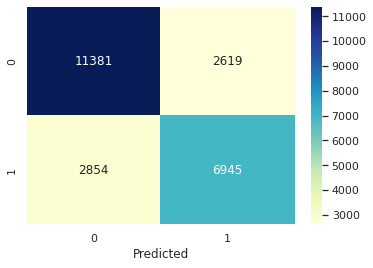

In [26]:
import seaborn as sns
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt ="g", cmap='YlGnBu')
plt.xlabel("Predicted")
plt.show("Actual")
plt.show()

In [ ]:
f1_score(y_test, y_test_pred)

0.7173475184630481

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81     14000
           1       0.73      0.71      0.72      9799

    accuracy                           0.77     23799
   macro avg       0.76      0.76      0.76     23799
weighted avg       0.77      0.77      0.77     23799



In [ ]:
#exporting model

import pickle

In [ ]:
pickle.dump(rfc, open('rfc_model.pkl','wb'))

pickle.dump(rfc, open('rfc_model.pkl','wb'))